<a href="https://colab.research.google.com/github/manishareddynarayan/Manisha_INFO5731_Fall2021/blob/main/Manisha_Narayan_INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [115]:
# Write your code here
import pandas as pd
#importing analysis file
df1 = pd.read_csv('sentiment.csv',encoding = "ISO-8859-1")
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
# corpus is a collection of texts
from gensim import corpora, models
import gensim
nltk.download('stopwords')
nltk.download('wordnet')
# to split a string into substrings using a regular expression
regTokenizer = RegexpTokenizer(r'\w+')
# to get stop words list in english
stopWords = stopwords.words('english')
# the process of grouping together the different inflected forms of a word
lemmtizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
# get ReviewMessage column from the dataframe
reviews = df1.ReviewMessage.tolist()
# join the reviews into one string
reviews = ' '.join([str(element) for element in reviews])
reviews


'"Titanic" won a bazillion Oscars and is considered a classic by many. And, it now (counting this one) has 2400 reviews. So, what more can I say about this film that hasn\'t already been said? Well, very little--that is why this review is rather short.\n\nI give the film a 9 because it isn\'t perfect. Some of the characters, to me, seemed a bit simplistic. But, no matter if you like them or not, there\'s no denying the awesomeness of the film. After all, it looks like you are on a huge cruise ship and the special effects of the wreck (this isn\'t exactly a spoiler!) are amazing. So, like the story or not, the film is staggering to watch--particularly on a big screen. And, now that I think about this, this is exactly how I viewed director Cameron\'s other huge success, "Avatar". Well worth seeing once. I had few problems with this film, and I have heard a lot of criticisms saying it is overlong and overrated. True, it is over three hours long, but I was amazed that it goes by so quickly

In [123]:
ldaPred = []
for i in [reviews]:
    # clean and tokenize document string,removing stop words, stemming tokens and lemmatizing them
    lower = i.lower()
    # initialising empty array 
    textData = []
    # to split a string into substrings using a regular expression
    regTokens = regTokenizer.tokenize(lower)
    stopped_tokens = [i for i in regTokens if not i in stopWords]
    # doing things properly with the use of a vocabulary and morphological analysis of words,
    lemmtizerTokens = [lemmtizer.lemmatize(word,'v') for word in stopped_tokens]
    # add tokens to list
    textData.append(lemmtizerTokens)
    # turing in term dictionary
    dictionary = corpora.Dictionary(textData)
    # corpus is a collection of texts
    corpus = [dictionary.doc2bow(text) for text in textData]
    # generating LDA model  
    ldaModel = gensim.models.ldaModel.LdaModel(corpus, num_topics=10,id2word = dictionary, passes=20)
    ldaPred.append(ldaModel.print_topics())
    # displaying top 10 clusters
    print(ldaModel.print_topics(num_words = 7))
    print()

[(0, '0.000*"film" + 0.000*"titanic" + 0.000*"movie" + 0.000*"make" + 0.000*"story" + 0.000*"love" + 0.000*"one"'), (1, '0.000*"titanic" + 0.000*"film" + 0.000*"movie" + 0.000*"cameron" + 0.000*"love" + 0.000*"one" + 0.000*"ship"'), (2, '0.020*"film" + 0.017*"titanic" + 0.017*"movie" + 0.009*"story" + 0.009*"make" + 0.008*"cameron" + 0.008*"love"'), (3, '0.000*"film" + 0.000*"titanic" + 0.000*"movie" + 0.000*"rise" + 0.000*"story" + 0.000*"time" + 0.000*"one"'), (4, '0.000*"film" + 0.000*"titanic" + 0.000*"movie" + 0.000*"cameron" + 0.000*"love" + 0.000*"rise" + 0.000*"like"'), (5, '0.000*"movie" + 0.000*"film" + 0.000*"titanic" + 0.000*"make" + 0.000*"one" + 0.000*"love" + 0.000*"story"'), (6, '0.000*"titanic" + 0.000*"movie" + 0.000*"film" + 0.000*"make" + 0.000*"cameron" + 0.000*"one" + 0.000*"story"'), (7, '0.000*"film" + 0.000*"titanic" + 0.000*"movie" + 0.000*"make" + 0.000*"story" + 0.000*"one" + 0.000*"see"'), (8, '0.000*"titanic" + 0.000*"film" + 0.000*"movie" + 0.000*"time" +

In [124]:
dfTopics = pd.DataFrame({'topics':ldaModel.print_topics(num_words = 8)})
# printing top results
print(dfTopics.head())
# storing the results to a csv file
dfTopics.to_csv('topics.csv')

                                              topics
0  (0, 0.000*"film" + 0.000*"titanic" + 0.000*"mo...
1  (1, 0.000*"titanic" + 0.000*"film" + 0.000*"mo...
2  (2, 0.020*"film" + 0.017*"titanic" + 0.017*"mo...
3  (3, 0.000*"film" + 0.000*"titanic" + 0.000*"mo...
4  (4, 0.000*"film" + 0.000*"titanic" + 0.000*"mo...


Describing the topics base on keywords
**bold text**


Topic-1 - About the titanic movie's love story.
keywords - (film,titanic,movie,make,story,love,one,see)

Topic-2 - About titanic movie and the love story in ship
keywords - (titanic,film,movie,cameron,love,one,ship,make)

Topic-3 - About titanic movie and the love story.
keywords - (film,titanic,movie,story,make,cameron,love,one)

Topic-4 - About titanic movie and its rise
keywords - (film,titanic,movie,rise,story,time,one,see)

Topic-5 - About titanic movie and its rise
keywords - (film,titanic,movie,cameron,love,rise,like,one)

Topic-6 - About titanic movie and the love story in ship
keywords - (movie,film,titanic,make,one,love,story,ship)

topic-7 - About titanic movie and its rise
keywords - (titanic,movie,film,make,cameron,one,story,rise)

Topic-8 - About titanic movie and the love story in ship
 keywords - (film,titanic,movie,make,story,one,see,ship)

Topic-9 - About the titanic movie's love story.
keywords - (titanic,film,movie,time,cameron,make,story,love)

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

2.1

The process of extracting positive or negative sentiment from text data is known as sentiment analysis. In this study, we use mutual information, Chi-Square, Information Gain, and TF-idf to pick features from a high-dimensional feature collection.
Sentiment classification is an automated technique that detects views in text and categorizes them as good, negative, or neutral based on the emotions expressed by consumers.

In [141]:
# Write your code here
# 2.2 Using  Naive Bayes model and SVM Model to build sentiment classifiers respectively.
import csv
import re
import nltk
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import random
import warnings

# Warnings are provided to warn the developer of situations that aren't necessarily exceptions
warnings.filterwarnings("ignore", category=DeprecationWarning)
#  which are generally filtered out before processing a natural language
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib



In [143]:
# reading the reviews file
df = pd.read_csv('sentiment.csv',encoding = "ISO-8859-1")
df.head()

,ReviewMessage,Sentiment
0,"""Titanic"" won a bazillion Oscars and is consid...",Positive
1,"I had few problems with this film, and I have ...",Positive
2,Who says that old fashioned romantic films don...,Positive
3,Titanic (1997)\n\n**** (out of 4)\n\nJames Cam...,Neutral
4,"You know, I love disaster movies, and you don'...",Negative


In [144]:
# returns the length of a list
len(df)

594

In [145]:
# to find sum
df.isnull().sum()

ReviewMessage    120
Sentiment        120
dtype: int64

In [148]:
# Removing special characters, numbers, stopwords,tokenization
df['ReviewMessage'] = df['ReviewMessage'].str.replace("[^a-zA-Z#]", " ")
#  which are generally filtered out before processing a natural language
stop = stopwords.words("english")
df['ReviewMessage'] = df['ReviewMessage'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
df['ReviewMessage'] = df['ReviewMessage'].apply(lambda x: word_tokenize(x))
# printing top values
df.head()

,ReviewMessage,Sentiment
0,"[Titanic, bazillion, Oscars, considered, class...",Positive
1,"[I, problems, film, I, heard, lot, criticisms,...",Positive
2,"[Who, says, old, fashioned, romantic, films, s...",Positive
3,"[Titanic, James, Cameron, Oscar, winning, love...",Neutral
4,"[You, know, I, love, disaster, movies, get, mu...",Negative


In [150]:
# lemmatization
lemmtizer = WordNetLemmatizer()
# the process of grouping together the different inflected forms of a word
df['ReviewMessage'] = df['ReviewMessage'].apply(lambda x: ' '.join([lemmtizer.lemmatize(word,'v') for word in x]))
df.head()

,ReviewMessage,Sentiment
0,Titanic bazillion Oscars consider classic many...,Positive
1,I problems film I hear lot criticisms say over...,Positive
2,Who say old fashion romantic film sell They ce...,Positive
3,Titanic James Cameron Oscar win love story sta...,Neutral
4,You know I love disaster movies get much bigge...,Negative


In [152]:
# Features Extraction
bowVectorizer = CountVectorizer()
# Used to transform a given text into a vector on the basis of the frequency of each word 
bowVec = bowVectorizer.fit_transform(df['ReviewMessage'])

bowVec.shape


(594, 7079)

In [154]:
# common algorithm to transform text into a meaningful representation of numbers
tfIdfVectorizer = TfidfVectorizer()
# used on traing data
tfIdf = tfIdfVectorizer.fit_transform(df['ReviewMessage'])
tfIdf.shape


(594, 7079)

In [169]:
df1 = df.dropna()

In [170]:
# a function in Sklearn model selection for splitting data arrays into two subsets

X_train, X_test, y_train, y_test = train_test_split(df1['ReviewMessage'], df1['Sentiment'], random_state=42, test_size=0.20)

# create pipeline
pipeLineNB = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])
# takes the training data as arguments
pipeLineNB.fit(X_train, y_train)
predictions = pipeLineNB.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))


[[ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0 13]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  0 67]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.00      0.00      0.00         1
    negative       0.00      0.00      0.00        13
     neutral       0.00      0.00      0.00        12
    positive       0.71      1.00      0.83        67

    accuracy                           0.71        95
   macro avg       0.12      0.17      0.14        95
weighted avg       0.50      0.71      0.58        95

0.7052631578947368


In [173]:
# a function in Sklearn model selection for splitting data arrays into two subsets
X_train, X_test, y_train, y_test = train_test_split(df1['ReviewMessage'], df1['Sentiment'], random_state=42, test_size=0.20)

# create pipeline
pipeline_svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

pipeline_svm.fit(X_train, y_train)
predictions = pipeline_svm.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0 13]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  0 67]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.00      0.00      0.00         1
    negative       0.00      0.00      0.00        13
     neutral       0.00      0.00      0.00        12
    positive       0.71      1.00      0.83        67

    accuracy                           0.71        95
   macro avg       0.12      0.17      0.14        95
weighted avg       0.50      0.71      0.58        95

0.7052631578947368


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
# Write your code here
import numpy as np
import pandas as pd
import warnings
# Warnings are provided to warn the developer of situations that aren't necessarily exceptions
warnings.filterwarnings('ignore')
# importing matplot to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
# cross-platform, data visualization and graphical plotting library for Python
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

In [ ]:
trainDataFrame = pd.read_csv('train.csv')
testDataFrame = pd.read_csv('test.csv')

In [ ]:
# Make column labels lowercase
trainDataFrame.columns = map(str.lower, trainDataFrame.columns)
testDataFrame.columns = map(str.lower, testDataFrame.columns)
# Replace spaces in columns with underscore
trainDataFrame.columns = trainDataFrame.columns.str.replace('\s+', '_')
testDataFrame.columns = testDataFrame.columns.str.replace('\s+', '_')

In [ ]:
trainDataFrame.head()


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
testDataFrame.head()


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
trainDataFrame.shape


(1460, 81)

In [ ]:
# Set 'Id' column as index
trainDataFrame.set_index('id', inplace=True)
testDataFrame.set_index('id', inplace=True)
# Drop 'pid' column if not needed

trainDataFrame.head()


,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
trainDataFrame.columns


Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [ ]:
trainDataFrame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1460 non-null   int64  
 1   mszoning       1460 non-null   object 
 2   lotfrontage    1201 non-null   float64
 3   lotarea        1460 non-null   int64  
 4   street         1460 non-null   object 
 5   alley          91 non-null     object 
 6   lotshape       1460 non-null   object 
 7   landcontour    1460 non-null   object 
 8   utilities      1460 non-null   object 
 9   lotconfig      1460 non-null   object 
 10  landslope      1460 non-null   object 
 11  neighborhood   1460 non-null   object 
 12  condition1     1460 non-null   object 
 13  condition2     1460 non-null   object 
 14  bldgtype       1460 non-null   object 
 15  housestyle     1460 non-null   object 
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

In [ ]:
testDataFrame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1459 non-null   int64  
 1   mszoning       1455 non-null   object 
 2   lotfrontage    1232 non-null   float64
 3   lotarea        1459 non-null   int64  
 4   street         1459 non-null   object 
 5   alley          107 non-null    object 
 6   lotshape       1459 non-null   object 
 7   landcontour    1459 non-null   object 
 8   utilities      1457 non-null   object 
 9   lotconfig      1459 non-null   object 
 10  landslope      1459 non-null   object 
 11  neighborhood   1459 non-null   object 
 12  condition1     1459 non-null   object 
 13  condition2     1459 non-null   object 
 14  bldgtype       1459 non-null   object 
 15  housestyle     1459 non-null   object 
 16  overallqual    1459 non-null   int64  
 17  overallcond    1459 non-null   int64  
 18  yearb

In [ ]:
# Convert 'MSSubClass' column to type(str)
trainDataFrame['mssubclass'] = trainDataFrame['mssubclass'].astype(str)
testDataFrame['mssubclass'] = test_df['mssubclass'].astype(str)


In [ ]:
trainDataFrame['mssubclass'].dtype


dtype('O')

In [ ]:
# Create list of numeric columns
numeric_columns = trainDataFrame.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)
tnumeric_columns = testDataFrame.select_dtypes(include=[np.number]).columns.tolist()
print(tnumeric_columns)


['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']
['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [ ]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')



 36 numerical columns


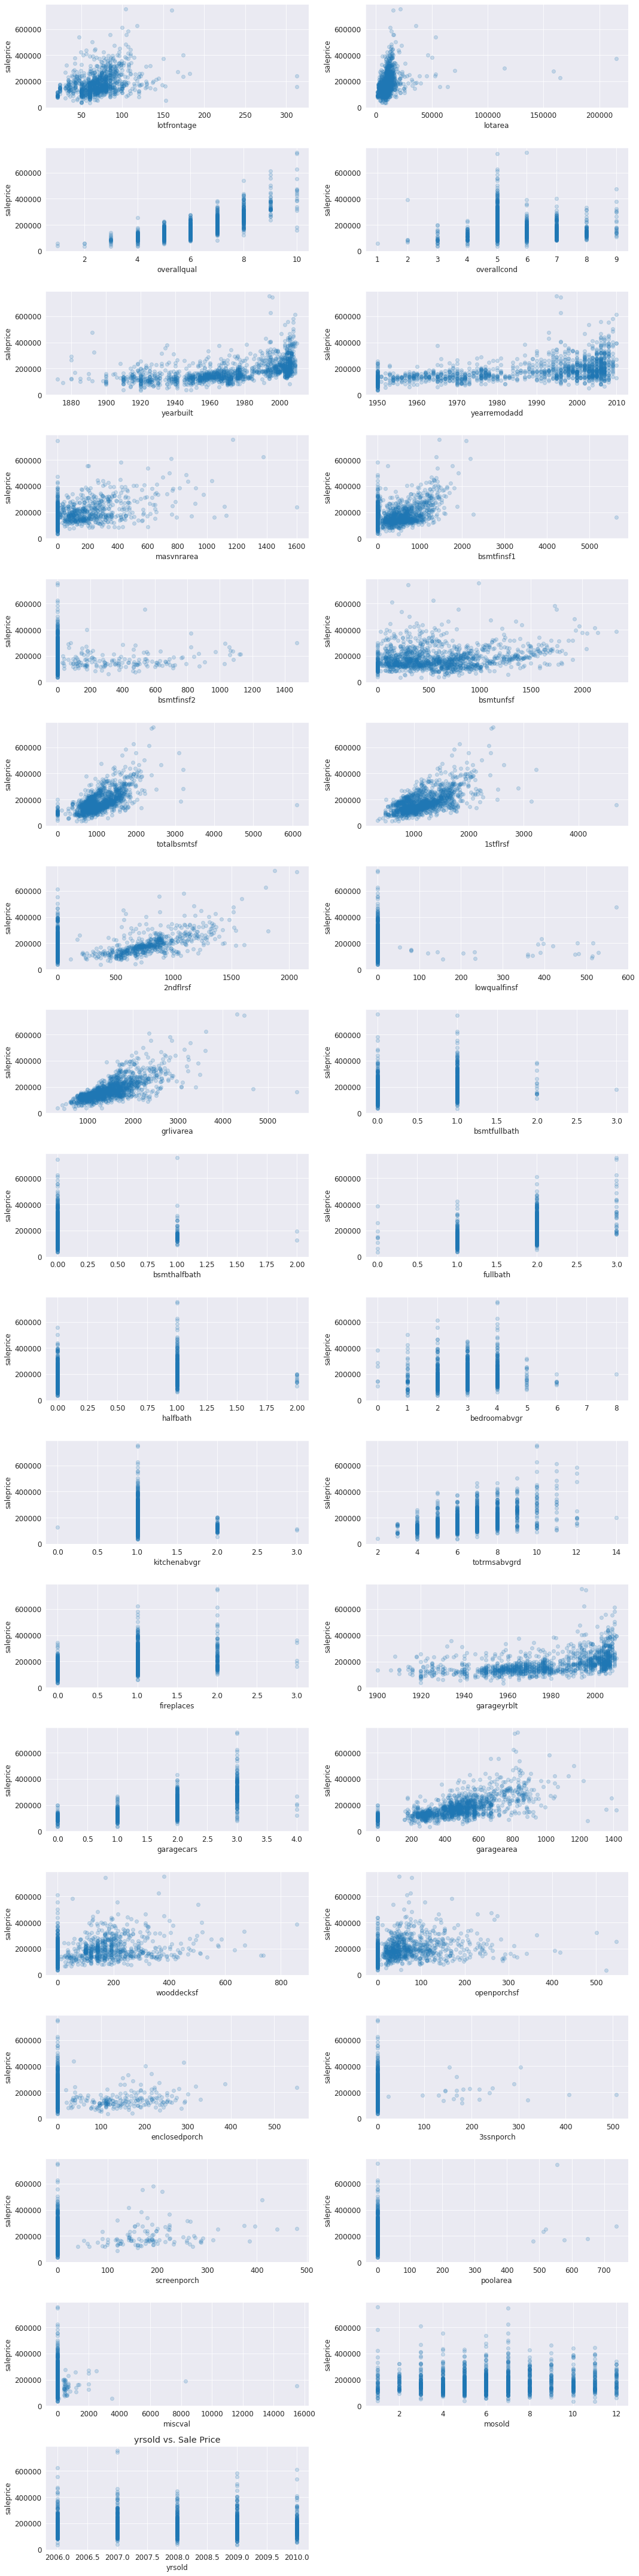

In [ ]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
 fig=plt.figure(figsize=(15,60))
 for i, var_name in enumerate(variables):
   ax=fig.add_subplot(n_rows,n_cols,i+1)
   sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
 ax.set_title(var_name +" vs. Sale Price")
 fig.tight_layout()
 plt.show()
draw_scatters(trainDataFrame, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)


In [ ]:
df = pd.read_csv('test.csv')
df.shape

(1459, 80)

In [ ]:
# Create list of categorical columns
cat_columns = trainDataFrame.select_dtypes(include=[object]).columns.tolist()
tcat_columns = testDataFrame.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['mssubclass', 'mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype', 'salecondition']


In [ ]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')

44 categorical columns


In [ ]:
corr = trainDataFrame.corr()
corr['saleprice'].sort_values(ascending=False)


saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3ssnporch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: saleprice, dtype: float64

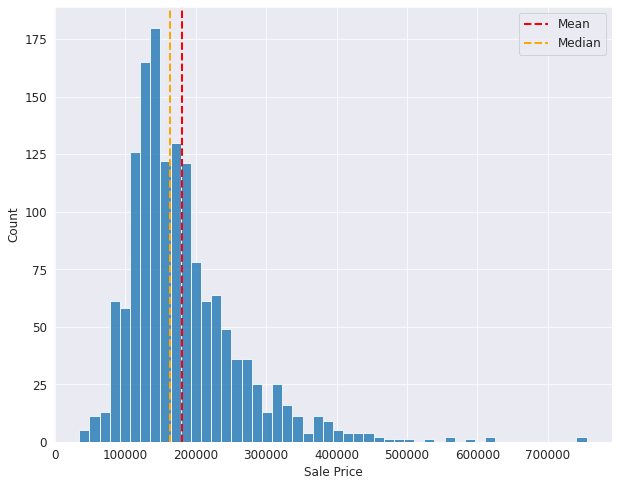

In [ ]:
trainDataFrame['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(trainDataFrame['saleprice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(trainDataFrame['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

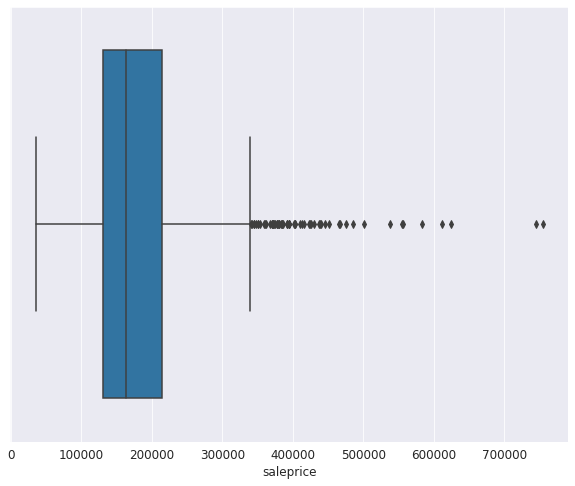

In [ ]:
sns.boxplot(trainDataFrame['saleprice'], orient='h')
plt.show()

In [ ]:
trainDataFrame['saleprice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

In [ ]:
trainDataFrame['saleprice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

In [ ]:
# Create function to reject outliers, default stdev is 1.5
def reject_outliers(data, m=1.5):
 return data[abs(data - np.mean(data)) < m * np.std(data)]


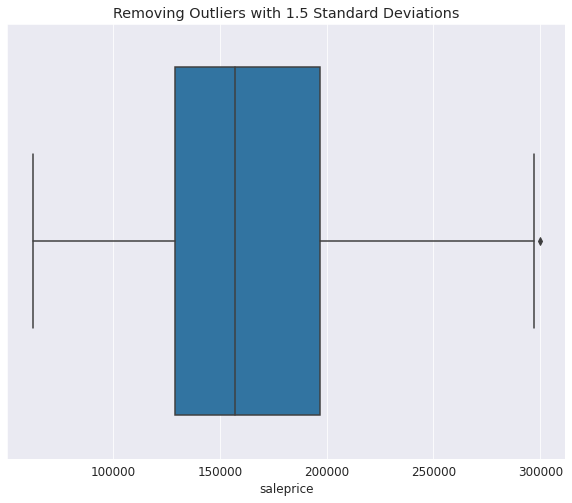

In [ ]:
# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(trainDataFrame['saleprice']),
 orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()


In [ ]:
# Make series of mask
mask = reject_outliers(trainDataFrame['saleprice']).tolist()
mask[0:20]

[208500,
 181500,
 223500,
 140000,
 250000,
 143000,
 200000,
 129900,
 118000,
 129500,
 144000,
 279500,
 157000,
 132000,
 149000,
 90000,
 159000,
 139000,
 139400,
 230000]

In [ ]:
# Mask as Boolean
mask_results = trainDataFrame['saleprice'].isin(mask)[0:20].tolist()
mask_results


[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict


{90000: True,
 118000: True,
 129500: True,
 129900: True,
 132000: True,
 139000: True,
 139400: True,
 140000: True,
 143000: True,
 144000: True,
 149000: True,
 157000: True,
 159000: True,
 181500: True,
 200000: False,
 208500: True,
 223500: True,
 230000: True,
 250000: True,
 279500: False}

In [ ]:
# New dataframe based off mask
trainDataFrame = trainDataFrame[~trainDataFrame['saleprice'].isin(mask) == False]
trainDataFrame.head(20)


,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
trainDataFrame['saleprice'].describe()


count      1330.000000
mean     165529.114286
std       50948.464069
min       62383.000000
25%      128912.500000
50%      157000.000000
75%      196875.000000
max      299800.000000
Name: saleprice, dtype: float64

In [ ]:
# Columns with null (np.nan) values
nan_col_list = trainDataFrame.columns[trainDataFrame.isnull().any()].tolist()
nan_col_list

['lotfrontage',
 'alley',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature']

In [ ]:
tnan_col_list = testDataFrame.columns[testDataFrame.isnull().any()].tolist()
tnan_col_list

['mszoning',
 'lotfrontage',
 'alley',
 'utilities',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'bsmtfullbath',
 'bsmthalfbath',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype']

In [ ]:
# Sum of nan values of each column
nulls = trainDataFrame[nan_col_list].isnull().sum()
nulls


lotfrontage      249
alley           1242
masvnrtype         7
masvnrarea         7
bsmtqual          35
bsmtcond          35
bsmtexposure      36
bsmtfintype1      35
bsmtfintype2      36
electrical         1
fireplacequ      672
garagetype        72
garageyrblt       72
garagefinish      72
garagequal        72
garagecond        72
poolqc          1324
fence           1058
miscfeature     1278
dtype: int64

In [ ]:
tNulls = test_df[tnan_col_list].isnull().sum()
tNulls


mszoning           4
lotfrontage      227
alley           1352
utilities          2
exterior1st        1
exterior2nd        1
masvnrtype        16
masvnrarea        15
bsmtqual          44
bsmtcond          45
bsmtexposure      44
bsmtfintype1      42
bsmtfinsf1         1
bsmtfintype2      42
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
bsmtfullbath       2
bsmthalfbath       2
kitchenqual        1
functional         2
fireplacequ      730
garagetype        76
garageyrblt       78
garagefinish      78
garagecars         1
garagearea         1
garagequal        78
garagecond        78
poolqc          1456
fence           1169
miscfeature     1408
saletype           1
dtype: int64

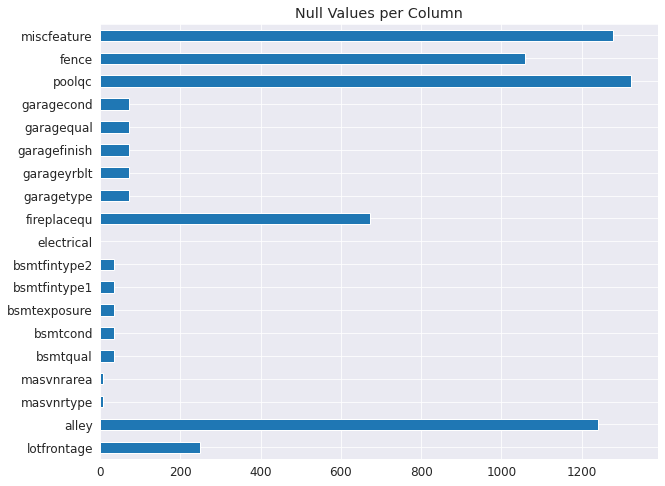

In [ ]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()


In [ ]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in trainDataFrame.columns:
 missing_data = len(trainDataFrame) - trainDataFrame[col].count()
 if (missing_data > 0 or missing_data =='NaN'):
  print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(trainDataFrame))) * 
 100, 3)), '% of total')


Missing data in each dataframe column:
lotfrontage : 249 missing values is 18.722 % of total
alley : 1242 missing values is 93.383 % of total
masvnrtype : 7 missing values is 0.526 % of total
masvnrarea : 7 missing values is 0.526 % of total
bsmtqual : 35 missing values is 2.632 % of total
bsmtcond : 35 missing values is 2.632 % of total
bsmtexposure : 36 missing values is 2.707 % of total
bsmtfintype1 : 35 missing values is 2.632 % of total
bsmtfintype2 : 36 missing values is 2.707 % of total
electrical : 1 missing values is 0.075 % of total
fireplacequ : 672 missing values is 50.526 % of total
garagetype : 72 missing values is 5.414 % of total
garageyrblt : 72 missing values is 5.414 % of total
garagefinish : 72 missing values is 5.414 % of total
garagequal : 72 missing values is 5.414 % of total
garagecond : 72 missing values is 5.414 % of total
poolqc : 1324 missing values is 99.549 % of total
fence : 1058 missing values is 79.549 % of total
miscfeature : 1278 missing values is 96.

In [ ]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['miscfeature',
 'fence',
 'poolqc',
 'garagecond',
 'garagequal',
 'garagefinish',
 'garagetype',
 'fireplacequ',
 'bsmtfintype1',
 'bsmtfintype2',
 'bsmtexposure',
 'alley']


In [ ]:
trainDataFrame[col_na] = trainDataFrame[col_na].fillna('NA')
print(trainDataFrame.shape)
testDataFrame[col_na] = testDataFrame[col_na].fillna('NA')
trainDataFrame.head()


(1330, 80)


,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
def make_randoms(df, col):
 return np.random.normal(df[col].mean(),
 scale=df[col].std(),
 size=df[col].isnull().sum()).astype(int)


In [ ]:
garageRand = make_randoms(trainDataFrame,'garageyrblt')
garageRand
TgarageRand = make_randoms(testDataFrame,'garageyrblt')


In [ ]:
lot_frontage_rand = make_randoms(trainDataFrame,'lotfrontage')
lot_frontage_rand


array([ 77,  88,  34,  92,  46,  60,  25,  35,  91,  86,  34,  63,  88,
       115,  34,  46, 135,  72, 116,  43,  58,  98, 171,  55,  41,  44,
        36,  40,  69,  74,  58,  46,  83,  90, 120,  71,  65,  54,  83,
        57,   8,  67,  35,  28,  75,  85,  81,  89,  55,  54,  85, 105,
        63,  83,  51,  74,  82,  66,  77,  33,  14,  46,  56,  78,  57,
        90, 100,  49,  66,  99,  86,  90,  90,  82,  63,  47,  73,  76,
        80,  56,  72,  93,  36,  43,  54, 122,  70,  89,  96,  64, 111,
        83, 130,  74,  84,  64, 103,  58, 101,  56,  99,  91,  46,  80,
        33,  97,  65,  85,  76,  23,  92,  77,  26,  95,  58,  89,  56,
       103,  93,  46,  46,  97, 112,  90,  90,  80,  88,  90,  27,  50,
        86,  47,  72,  63,  51,  67,  41,  82,  67,  82,  64,  77,  87,
        66,  77,  74,  73,  34,  44,  51, 104,  87,  31,  53,  64,  76,
        50,  47,  75,  52,  55,  84,  19, 106,  84,  50,  77,  63,  78,
        32,  81,  60,  77,  74,  61,  50, 100,  91,  98,  83,  4

In [ ]:
tlot_frontage_rand = make_randoms(test_df,'lotfrontage')


In [ ]:
# Replace the NaNs 
trainDataFrame['lotfrontage'] = trainDataFrame['lotfrontage'].fillna('9999')
trainDataFrame['garageyrblt'] = trainDataFrame['garageyrblt'].fillna('9999')
trainDataFrame.loc[trainDataFrame['lotfrontage']=='9999','lotfrontage'] = lot_frontage_rand
trainDataFrame.loc[trainDataFrame['garageyrblt']=='9999','garageyrblt'] = garage_yr_blt_rand


In [ ]:
# Drop the rest
print('Before: ', trainDataFrame.shape)
trainDataFrame = trainDataFrame.dropna()
print('After: ', trainDataFrame.shape)


Before:  (1330, 80)
After:  (1287, 80)


In [ ]:
# Verify that all null values are gone
nan_col_list = trainDataFrame.columns[trainDataFrame.isnull().any()].tolist()
nan_col_list


[]

In [ ]:
nan_col_list = trainDataFrame.columns[trainDataFrame.isnull().any()].tolist()
nulls = trainDataFrame[nan_col_list].isnull().sum()
nulls


Series([], dtype: float64)

In [ ]:
# Replace the NaNs 
testDataFrame['lotfrontage'] = testDataFrame['lotfrontage'].fillna('9999')
testDataFrame['garageyrblt'] = testDataFrame['garageyrblt'].fillna('9999')
testDataFrame.loc[testDataFrame['lotfrontage']=='9999','lotfrontage'] = tlot_frontage_rand
testDataFrame.loc[testDataFrame['garageyrblt']=='9999','garageyrblt'] = TgarageRand


In [ ]:
# Drop the rest
print('Before: ', testDataFrame.shape)
testDataFrame = testDataFrame.dropna()
print('After: ', testDataFrame.shape)


Before:  (1459, 79)
After:  (1389, 79)


In [ ]:
# Verify that all null values are gone
tnan_col_list = testDataFrame.columns[testDataFrame.isnull().any()].tolist()
tnan_col_list


[]

In [ ]:
tnan_col_list = testDataFrame.columns[testDataFrame.isnull().any()].tolist()
tnulls = testDataFrame[nan_col_list].isnull().sum()
tnulls


Series([], dtype: float64)

In [ ]:
trainDataFrame.head(20)


,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,60,RL,77,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [ ]:
# Re-index  so indices match 
trainDataFrame.reset_index(inplace=True)
trainDataFrame.reset_index(inplace=True)
trainDataFrame.head(20)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,8,60,RL,77,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
7,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
8,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,...,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,WD,Normal,118000
9,11,20,RL,70,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,...,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NA,Detchd,1965,Unf,1,384,TA

In [ ]:
dummies_df = pd.get_dummies(trainDataFrame[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
tdummies_df = pd.get_dummies(testDataFrame[cat_columns],prefix_sep='_',drop_first=False)
dummies_df.head(20)


(1287, 271)


,mssubclass_120,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NA,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,...,garagequal_Po,garagequal_TA,garagecond_Ex,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,paveddrive_N,paveddrive_P,paveddrive_Y,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_NA,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
trainDataFrame = pd.concat([trainDataFrame, dummies_df], axis=1)
print(trainDataFrame.shape)
trainDataFrame.head(20)
test_df = pd.concat([test_df, tdummies_df], axis=1)


(1287, 352)


In [ ]:
trainDataFrame.drop(cat_columns,axis=1,inplace=True)
testDataFrame.drop(cat_columns,axis=1,inplace=True)
trainDataFrame.head()


,id,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mssubclass_120,mssubclass_160,mssubclass_180,...,garagequal_Po,garagequal_TA,garagecond_Ex,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,paveddrive_N,paveddrive_P,paveddrive_Y,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_NA,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,65,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,80,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,68,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,60,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,84,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split 
# a function in Sklearn model selection for splitting data arrays into two subsets
X = trainDataFrame.drop('saleprice',axis=1)
y = trainDataFrame['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
for dataset in [X_train, X_test, y_train, y_test]:
 print(dataset.shape)


(965, 307)
(322, 307)
(965,)
(322,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(X_train)
XTestScaled = scaler.transform(X_test)


In [ ]:
scaler.mean_[1]


69.06113989637306

In [ ]:
scaler.scale_[1]


25.162341150460126

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
regEx = LinearRegression()
regEx.fit(X_train, y_train)# Make predictions using the testing set
yPred = regEx.predict(X_test)
yPred = regEx.predict(X_test)


In [ ]:
print('Coefficients: \n', regr.coef_)
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-1.53408593e+00  5.08161081e+01  6.55217634e-01  5.17875307e+03
  4.19436876e+03  3.11064362e+02  1.42109332e+02  6.52169433e+00
  1.19628316e+01  6.39465749e+00  2.71891668e+00  2.10763906e+01
  1.10434271e+01  2.84082081e+01 -8.93623834e+00  3.05153960e+01
  1.86714016e+03 -1.29931704e+03  9.47439149e+02  1.04782232e+03
  1.68304781e+03 -1.11016811e+04 -1.00290951e+03  9.83430772e+02
  1.99621983e+00  2.77320610e+03  9.03741999e+00  1.18505747e+01
  1.61555611e+01  1.86873187e+01  4.19601654e+00  3.02192066e+01
  1.89705257e+02  4.23979846e+00  1.06877259e+02 -1.29207535e+02
 -3.87941314e+03 -1.56052377e+04 -2.75420101e+03 -6.37567181e+01
  5.08651287e+03  1.44863984e+03 -2.30947387e+03 -1.07693297e+04
  8.48240509e+03  4.28292307e+03  8.08675543e+03  1.05174673e+04
 -3.27422212e+03  4.03846760e+03 -3.28753686e+03 -2.52053227e+04
  1.70063913e+04  2.65740189e+03  7.23559781e+03 -1.69406828e+03
 -9.89841440e+03  9.89841440e+03 -2.20203291e+03  2.31052340e+01
  2.17892